<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/4_Manipulation_du_DOM_et_modules_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
-------------------

Les cellules de cette section installent l'extension qui customise les cellules JavaScript et HTML. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.


In [ ]:
!pip3 install classroom-extensions

In [ ]:
%load_ext classroom_extensions.web

# Document Object Model (DOM)
--------

<img alt="" src="https://blog.timo-reymann.de/content/images/2022/09/image-5.png" width="350px" align="right"/>

* Le Modèle Objet de Document (DOM) est une représentation hiérarchique des éléments d'une page web, permettant aux développeurs d'interagir avec le contenu HTML, CSS et les éléments interactifs de la page.

* Le DOM permet de manipuler et de modifier dynamiquement la structure, le style et le contenu d'une page web, créant ainsi des expériences interactives et réactives pour les utilisateurs.

* En utilisant JavaScript, les développeurs peuvent accéder aux éléments du DOM, modifier leurs propriétés, ajouter ou supprimer des éléments, et réagir aux événements utilisateur tels que les clics de souris et les saisies au clavier.
  - Cette interaction dynamique permet de créer des fonctionnalités avancées et des mises à jour en temps réel sur les pages web.

* Le DOM est donc à la base de toute manipulation du contenu affiché à l'écran *sans nécessiter un rafraîchissement de page*. Il fournit une API uniforme qui ne dépend pas d'un navigateur spécifique.

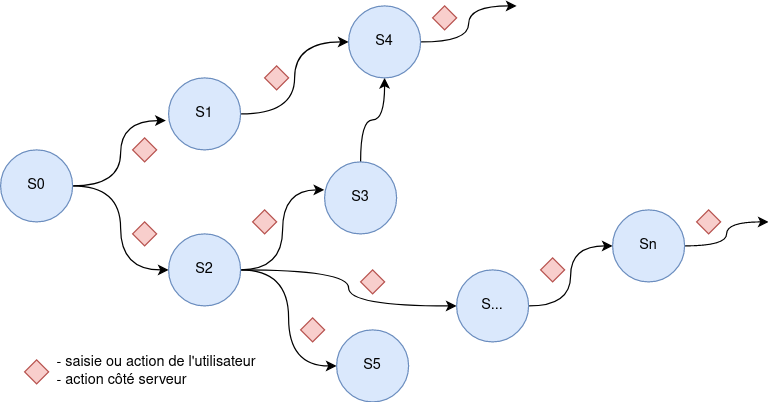

### **Remarques:**

* Dans le cours, nous allons utiliser les APIs DOM natives pour les exemples et exercices. La plupart des cadriciels, cependant, visent à fournir des simplifications du DOM et même dans certains cas à abstraire complètement son fonctionnement.

* Nous ne pouvons pas couvrir l'ensemble des APIs, et ce cours va donc présenter certaines APIs principales et proposer des exercices pour pratiquer.

## Structure des documents HTML

* On peut visualiser un document HTML comme un ensemble de boîtes.

* La page suivante peut être visualisée comme la structure en boîtes qui suit.

In [ ]:
%%html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Charlie Brown</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <h1>Charlie Brown</h1>
    <p class="flow-text">Salut, je m'appelle Charlie et cette page parle de moi.</p>
    <p class="flow-text">Il y a un article sur Wikipédia sur moi
        <a href="https://en.wikipedia.org/wiki/Charlie_Brown">ici</a>.</p>
</body>
</html>

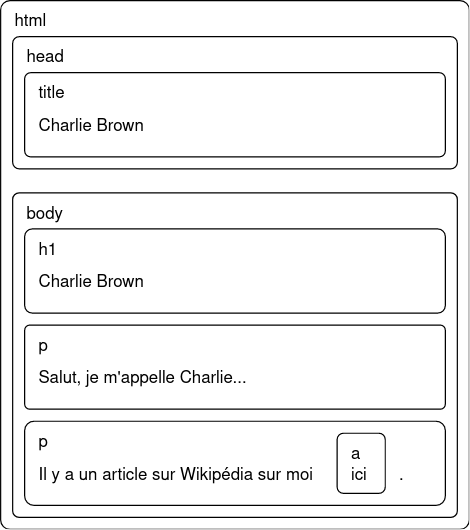

* La structure de données que le navigateur construit ressemble à cette forme ci-dessus.
* Pour chaque boîte, il y a un objet avec lequel nous pouvons interagir pour découvrir des choses telles que la balise HTML qu'il représente, et quelles boîtes et textes il contient.
* La liaison globale (binding) `document` nous donne accès à ces objets.
    - Sa propriété `documentElement` fait référence à l'objet représentant la balise `<html>`.
    - Étant donné que chaque document HTML a un `<head>` et un `<body>`, `document` possède également des propriétés `head` et `body` qui pointent vers ces éléments.

## Structure de données arborescente

Sur les documents :

* Le DOM est une structure de données arborescente dont le nœud `document.documentElement` sert de racine.
* Les nœuds sont des éléments qui présentent des balises HTML et déterminent la structure du document.
* Ces nœuds peuvent avoir des nœuds enfants.
    - Par exemple, `document.body` peut avoir des enfants qui sont des nœuds feuilles, tels que des morceaux de texte ou des commentaires.

Sur les nœuds :

* Chaque objet nœud DOM a une propriété `nodeType`, qui contient un code (numéro) qui identifie le type de nœud.
    - Les éléments ont le code `1`, qui est également défini comme la propriété constante `Node.ELEMENT_NODE`.
    - Les nœuds de texte, représentant une section de texte dans le document, reçoivent le code `3` (`Node.TEXT_NODE`).
    - Les commentaires ont le code `8` (`Node.COMMENT_NODE`).


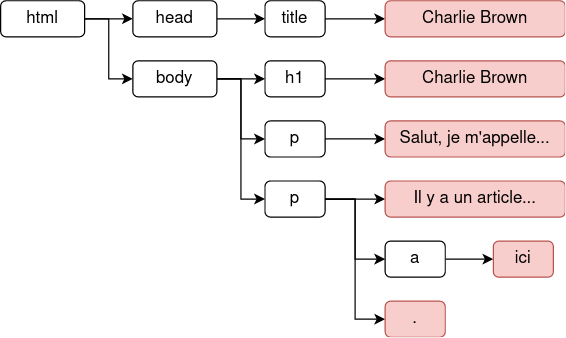

### Types de noeuds possibles

|Constante | 	Valeur 	| Description|
|----------|----------|------------|
| `Node.ELEMENT_NODE` |	`1` |	Un noeud Element tel que `<p>` ou `<div>`. |
| `Node.TEXT_NODE` |	`3` |	Le Text actuel de l'Element ou Attr. |
| `Node.PROCESSING_INSTRUCTION_NODE` |	`7` |	Une ProcessingInstruction d'un document XML tel que la déclaration `<?xml-stylesheet ... ?>`.|
| `Node.COMMENT_NODE`  |	`8` |	Un noeud Comment.|
| `Node.DOCUMENT_NODE` |	`9` |	Un noeud Document. |
| `Node.DOCUMENT_TYPE_NODE` |	`10` |	Un noeud DocumentType c'est-à-dire `<!DOCTYPE html>` pour des documents HTML5. |
|`Node.DOCUMENT_FRAGMENT_NODE` | 	`11`  |	Un noeud DocumentFragment. |

# L'objet `window`
--------------

* L'objet global `window` ouvre la porte à la quasi-totalité des fonctionnalités d'une application web et du navigateur, y compris la manipulation du DOM. Lors de l'exécution des fonctions JavaScript indépendantes, le contexte (`this`) pointe vers l'objet window.

* On peut y accéder via toute fonction dans la page web:
   - Le DOM via la propriété `window.document`, ou `document` directement.

   - La barre d'adresse: via la propriété `window.location`
   
   - Plusieurs fonctionnalités du navigateur, la chaîne de l'agent utilisateur, etc.

In [ ]:
%%javascript

console.log(window.location);
console.log(window.navigator.userAgent);

<classroom_extensions.web.JavascriptWithConsole object>

## `alert`, `confirm` et `prompt`

* `alert`: permet l'affichage d'une boîte de dialogue simple avec un bouton OK.

* `prompt`: demande à l'usager d'entrer une chaîne et la retourne la chaîne entrée.

* `confirm`: affiche un message et attend que l'utilisateur clique OK ou Annuler, et retour une valeur booléenne.

In [ ]:
%%javascript

function browserDialogs() {
  do {
    let name = prompt("Quel est votre nom?");
    let correct = confirm("Vous avez entré: " + name);
  } while (! correct);
  // Il s'agit d'une très mauvaise pratique de sécurité
  alert("Hello " + name);
}

 // browserDialogs();

# Parcourir le DOM
---------

* Les nœuds DOM contiennent une multitude de liens vers d'autres nœuds à proximité. Le schéma suivant les illustre :

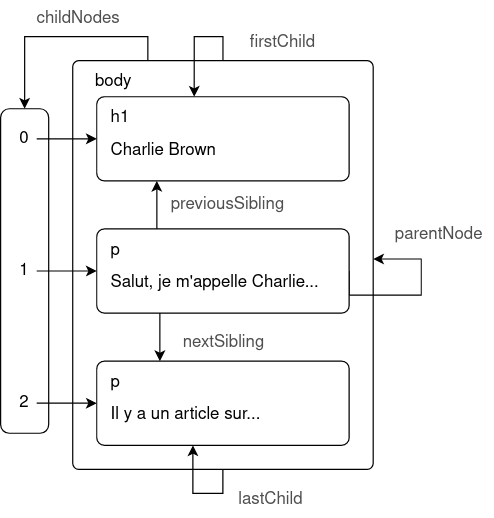

## Propriétés des nœuds

* Chaque nœud a une propriété `parentNode` qui pointe vers le nœud dont il fait partie, le cas échéant.

* Chaque nœud élément (nœud de type `Node.ELEMENT_NODE`) a une propriété `childNodes` qui pointe vers un objet de type tableau contenant ses nœuds enfants.

* Les propriétés `firstChild` et `lastChild` pointent vers le premier et le dernier élément enfant ou ont une valeur `null` pour un nœud sans enfant.

* `previousSibling` et `nextSibling` pointent vers des nœuds adjacents, qui sont des nœuds avec le même parent qui apparaissent immédiatement avant ou après le nœud lui-même.
    - Pour un premier enfant, `previousSibling` sera `null`, et pour un dernier enfant, `nextSibling` sera `null`.

* Il existe également la propriété `children` qui ressemble à `childNodes`, mais ne contient que des nœuds éléments (`Node.ELEMENT_NODE`), pas d'autres types de nœuds enfants.

### Autres proprietés des noeuds

* `nodeValue` - Contenu textuel des noeuds de type texte ou commentaire.

* `nodeName` - Nom de la balise du noeud (en majuscules), sans les caractères `<`
et `>` (ex., `P`, `H1`, `HEAD`, `A`, etc.)

**Source:** [MDN Web Docs - element.nodeType](https://developer.mozilla.org/fr/docs/Web/API/Node/nodeType)


## Parcourir le DOM de manière récursive

* Exemple de comment parcourir le DOM et déterminer si un élément type text (`Node.TEXT_NODE`) contient une chaîne de caractères donnée :

In [ ]:
%%javascript --target=disk --filename=/content/navigate.js

function talksAbout(node, str) {
    if (node.nodeType == Node.ELEMENT_NODE) {
        for (let i = 0; i < node.childNodes.length; i++) {
            if (talksAbout(node.childNodes[i], str)) {
                return true;
            }
        }
        return false;
    } else if (node.nodeType == Node.TEXT_NODE) {
        return node.nodeValue.indexOf(str) > -1;
    }
}

console.log(`Parle d'article: ${talksAbout(document.body, "article")}`);
console.log(`Parle de livre: ${talksAbout(document.body, "livre")}`);

In [ ]:
%http_server --port=8000 --directory=/content

Stopping any server listening on port 8000...
Starting server listening on port 8000...


In [ ]:
%%html --console

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Charlie Brown</title>
    <script defer src="https://localhost:8000/navigate.js"></script>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <h1>Charlie Brown</h1>
    <p>Salut, je m'appelle Charlie et cette page parle de moi.</p>
    <p>Il y a un article sur Wikipédia sur moi
        <a href="https://en.wikipedia.org/wiki/Charlie_Brown">ici</a>.</p>
</body>
</html>

### **Remarque:**

* La fonctionnalité ci-dessous ne marche pas sur les dernières versions de Firefox.
* Utilisez Chrome ou Opera si vous voulez accéder au serveur HTTP hébergé par le conteneur du cahier Google Colab.

In [ ]:
%%writefile charlie.html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Charlie Brown</title>
    <script defer src="navigate.js"></script>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <h1>Charlie Brown</h1>
    <p>Salut, je m'appelle Charlie et cette page parle de moi.</p>
    <p>Il y a un article sur Wikipédia sur moi
        <a href="https://en.wikipedia.org/wiki/Charlie_Brown">ici</a>.</p>
</body>
</html>

Overwriting charlie.html


In [ ]:
# Pour utiliser le proxy de Google Colab et créer une URL que nous
# permet d'accéder notre serveur Web à partir d'autre onglet du navigateur
from google.colab import output
output.serve_kernel_port_as_window(8000, path='/')

<IPython.core.display.Javascript object>

## Attendre le chargement de la page Web

* Lorsque le code JavaScript s'exécute, il est possible que la page n'aie pas fini de charger complètement. Dans ce cas, l'arbre DOM peut ne pas avoir été instancié complètement et peut changer.

* Le document HTML est exécuté de haut en bas de sorte que le contenu de la balise `<head>` est exécuté avant le chargement du reste de la page.

* Nous devons donc nous assurer que tous les éléments HTML sont d'abord rendus sur le navigateur avant de changer le DOM.

### Utiliser le gestionnaire d'événement

* **Une façon d'exécuter un bloc de code après le chargement du DOM, c'est de le placer dans le gestionnaire d'événement :**
```javascript
window.onload = function () {
  // instructions à exécuter
}

 // ou :
window.addEventListener('load', () => {
  // instructions à exécuter  
});

 // ou attendre le chargement/parsing du DOM uniquement
// (sans les ressources externes)
window.addEventListener('DOMContentLoaded', () => {
  // instructions à exécuter  
});
```

### Utiliser l'attribut `defer` de la balise `<script>`

* Si vous placez le code dans un fichier externe, une autre façon de l’exécuter après le parsing du document HTML c'est d'utiliser l'attribut booléen `defer` de la balise `<script>` :
```html
<script defer src="fichier.js"></script>
```

* Selon la spécification HTML, les fichiers marqués avec l'attribut `defer` sont téléchargés en parallèle avec les autres ressources, mais sont exécutés après le parsing du HTML:

![](https://html.spec.whatwg.org/images/asyncdefer.svg)

**Source:** [HTML - Living Standard](https://html.spec.whatwg.org/multipage/scripting.html#attr-script-defer)

### **Remarques:**

* Les scripts importés avec l'attribute `defer` son exécutés **avant** le code des gestionnaires d'événements `load` et `DOMContentLoaded`.

* Plus de détais sur:
  - [https://html.spec.whatwg.org/multipage/parsing.html#the-end](https://html.spec.whatwg.org/multipage/parsing.html#the-end)
  - [https://stackoverflow.com/questions/27300058/window-onload-vs-script-defer](https://stackoverflow.com/questions/27300058/window-onload-vs-script-defer)

# Sélection d'éléments du DOM
-----------

* Parcourir l'arbre via l'objet `window.document` (ou simplement `document`) et le traverser de manière récursive pour accéder à n'importe quel nœud n'est généralement ni efficace ni une bonne idée.  Cette approche peut être lente, surtout s'il faut modifier certains nœuds seulement.

* Ce mécanisme est fragile et peut générer des erreurs :
   - Il ne fonctionnera pas si la structure change, et dans les applications actuelles la structure peut évoluer continuellement.
   - La structure peut aussi différer d'un navigateur à l'autre.

* Les APIs de manipulation du DOM offrent un ensemble de méthodes et de propriétés pour sélectionner et interagir avec les éléments d'une page web.

## Sélection d'éléments par balise

* Récupère plusieurs éléments qui correspondent à une balise (tag) donnée ("type") dans le DOM.

* Retourne un objet qui se comporte comme un tableau en lecture seule (vide si aucun élément ne correspond).
```javascript
let imgs = document.getElementsByTagName("img");
for (let i = 0; i < imgs.length; i++) {
	imgs[i].display = "none";
}
```

In [ ]:
%%html --console

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Sélection d'éléments par balise</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <h3>Snoopy</h3>
    <p>Snoopy est un chien, personnage principal du comic strip Peanuts.</p>
    <p><img src="https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png" width="200px"></p>

<script>
    let link = document.getElementsByTagName("img")[0];
    console.log(link.src);
</script>
</body>
</html>

## Sélection d'élément par son `id`

* Utile pour obtenir un seul élément du DOM.

* Les identificateurs sont uniques au DOM et la sélection par identificateur renvoie `null` si l'élément n'est pas trouvé.
```javascript
let charlie = document.getElementById("charlie");
if (charlie === null) {
    throw new Error("Élément non trouvé " + charlie) ;
}
console.log(charlie.src);
```

In [ ]:
%%html --console

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Sélection d’élément par id</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <h3>Charlie Brown</h3>
    <p>Charlie Brown est aussi un personnage du comic strip Peanuts.
        Lui et son chien Snoopy sont les principaux protagonistes de cette
        bande dessinée créée en 1950 par Charles M. Schulz,
        et publiée pendant près d'un demi-siècle par le même auteur.</p>
    <p><img id="charlie" src="https://upload.wikimedia.org/wikipedia/en/2/22/Charlie_Brown.png" width="200px"></p>

<script>
    let charlie = document.getElementById("charlie");
    if (charlie === null) {
        throw new Error("Élément non trouvé: " + charlie) ;
    }
    console.log(charlie.src);
</script>
</body>
</html>

## Sélection d'élément par une classe CSS spécifique

* Cette méthode récupère un ou plusieurs éléments qui correspondent à une classe CSS donnée.
```javascript
let elems = document.getElementsByClassName("warning");
if (elems.length > 0) {
    // fait quelque choses avec les éléments  
}
```

### **Remarques:**

* Les méthodes `getElementsByClassName()` et `getElementsByTagName()` retournent des listes en temps réel (*live lists*). Leur contenu peut changer après le retour par la fonction si de nouveaux éléments sont ajoutés ou retirés du DOM.

* Le contenu ne peut pas être modifié via le code JavaScript. Il ne s'agit pas d'un tableau de type `Array`, mais on peut toutefois obtenir un `Array` via la méthode `Array.from(nodeList)`

In [ ]:
%%html --console

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Sélection d'élément par class</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <h1 class="teal-text text-darken-4">Marcie Johnson</h1>
    <div class="row teal-text text-darken-4">
      <p>Marcie Johnson ou Marcie Carlin ou Marcie 1 est un personnage du comic
        strip Peanuts de Charles Schulz. Elle est gentille et intellectuelle.
        Elle a fait sa première apparition officielle le 20 juillet 1971.
      </p>
    </div>
    <div>
      <img src="https://upload.wikimedia.org/wikipedia/en/2/24/Marcie_from_Peanuts.png" width="200px">
    </div>
    <div class="row teal-text text-darken-4">
      <p>Marcie a des cheveux courts et noirs. Elle porte toujours un jean et un t-shirt.</p>
    </div>

<script>
    let elems = document.getElementsByClassName("teal-text");
    if (elems.length > 0) {
        for (let i= 0; i < elems.length; i++) {
            console.log(elems[i].nodeName);
        }
    }
</script>
</body>
</html>

## Sélection d'élément par `querySelector` / `querySelectorAll`

* Cette méthode donne la possibilité de passer un sélecteur CSS générique via la méthode `querySelectorAll()` et les résultats retournés ne sont pas dans une *live list*.

* La méthode `querySelector()` retourne uniquement le premier élément qui correspond au sélecteur CSS fourni.
```javascript
"#nav" // id=nav
"div" // Tout élément <div>
".warning" // class="warning"
"#log span" // Tout <span> descendant de id="log"
"#log > span" // Tout <span< enfant d'un élément dont l'id="log"
"body>h1:first-child" // Premier élément <h1> enfant du <body>
"div, #log" // Tous les éléments div, et tous les éléments dont id="log"
```

## Invocation sur des branches

* Toutes les méthodes peuvent être invoquées sur des branches (éléments du DOM) et pas seulement sur le document. Dans ce cas, la recherche est confinée au sous-arbre dont l'élément est la racine.
```javascript
// Assumant que l'élément dont id=log existe
let log = document.getElementById("log");
let error = log.getElementsByClassName("error");
if (error.length == 0) {
    // instructions à exécuter  
}
```

# Activité en classe

-----------


## Récupérer les éléments d'un type donné de balises

* La méthode `document.getElementsByTagName()` renvoie tous les éléments enfants avec un nom de balise donné. Implémentez votre propre version de cette méthode en tant que fonction qui prend un nœud et une chaîne de caractères (le nom de la balise) comme arguments et renvoie un tableau contenant tous les nœuds d'éléments descendants avec un nom de balise donné.

* Pour trouver le nom de balise d'un élément, utilisez sa propriété `nodeName`. Mais notez que cela renverra le nom de la balise en majuscules. Utilisez les méthodes de chaîne `toLowerCase()` ou `toUpperCase()` pour régler ce problème.
```javascript
byTagName(node, str);
```

<!--
  const byTagName = (node, str) => {
    const result = [];

    for(const child of node.children) {
        if (child.nodeName.toLowerCase() === str.toLowerCase()) {
            result.push(child);
        }
        result.push(...byTagName(child, str));
    }

    return result;
  };
-->

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div class="row s12 m12 l6 xl6 card">
<div class="col s12 m6 l2 xl2">
  <h4>Snoopy</h4>
  <p><img src="https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png" height="250px"></p>
</div>
<div class="col s12 m6 l2 xl2">
  <h4>Charlie Brown</h4>
  <p><img src="https://upload.wikimedia.org/wikipedia/en/2/22/Charlie_Brown.png" height="350px"></p>
</div>
<div class="col s12 m6 l2 xl2">
  <h4>Marcie Johnson</h4>
  <p><img src="https://upload.wikimedia.org/wikipedia/en/2/24/Marcie_from_Peanuts.png" height="350px"></p>
</div>
</div>

<script>
  // Completez le code...

  const byTagName = (node, str) => {
    const result = [];

    for(const child of node.children) {
        if (child.nodeName.toLowerCase() === str.toLowerCase()) {
            result.push(child);
        }
        result.push(...byTagName(child, str));
    }

    return result;
  };

  let elems = byTagName(document.body, "img");
  console.log("Elements : " + elems);
</script>

<!--
<div class="row valign-wrapper center-align">
<div class="col s3">
  <h4>Snoopy</h4>
  <p><img src="https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png" height="250px"></p>
</div>
<div class="col s3">
  <h4>Charlie Brown</h4>
  <p><img src="https://upload.wikimedia.org/wikipedia/en/2/22/Charlie_Brown.png" height="350px"></p>
</div>
<div class="col s3">
  <h4>Marcie Johnson</h4>
  <p><img src="https://upload.wikimedia.org/wikipedia/en/2/24/Marcie_from_Peanuts.png" height="350px"></p>
</div>
</div>

<script>
  const byTagName = (node, str) => {
    let nodes = [];
    let tag = str.toUpperCase();

    function findElements(node) {
      for (let i = 0; i < node.childNodes.length; i++) {
        let child = node.childNodes[i];
        if (child.nodeType == Node.ELEMENT_NODE && child.nodeName == tag) {
          nodes.push(child);
        }
        findElements(child);
      }
    }

    findElements(node);
    return nodes;
  }

  let elems = byTagName(document, "img");
  console.log("Elements : " + elems);
</script>
-->

# Modification des éléments du DOM
-------
Les éléments du DOM sont des objets JavaScript - par conséquent,
ils ont leurs propres propriétés qui peuvent être lues et modifiées.

* Il est possible d'étendre les éléments du DOM en modifiant leur objet `prototype`
* On peut ajouter des attributs aux éléments.
* On peut modifier les attributs standards/prédéfinis qui correspondent au contenu HTML (par ex., cible d'un lien, taille, style, contenu d'un champ de saisie, etc.)
  - Ces changements seront reflétés dans l'affichage du navigateur.


## Les classes du DOM

<img src="https://web.stanford.edu/class/cs98si/img/dom_types.png" width="650px" align="right">


<!--
**Source:** [Node properties: type, tag and contents](https://javascript.info/basic-dom-node-properties)
-->

* La racine de la hiérarchie des classes, construite sur le modèle prototypal de JavaScript, est [`EventTarget`](https://dom.spec.whatwg.org/#eventtarget) dont `Node` et les autres nœuds DOM en héritent. Cette classe sert de base, pour que tous les nœuds DOM supportent des *événements*.

* [`Node`](http://dom.spec.whatwg.org/#interface-node) est également une classe abstraite qui sert de base aux nœuds DOM. Elle fournit les fonctionnalités de l'arborescence de base : `parentNode`, `nextSibling`, `childNodes`, etc. Les objets `Node` ne sont jamais créés, mais il existe des classes de nœuds concrets qui en héritent: Text pour les nœuds de texte, `Element` pour les nœuds d'élément et d'autres plus exotiques comme `Comment` pour les nœuds de commentaire.

* [`Element`](http://dom.spec.whatwg.org/#interface-element), une classe de base pour les éléments DOM, fournit une navigation au niveau des éléments comme `nextElementSibling`, des enfants et des méthodes de recherche comme `getElementsByTagName`, `querySelector`. Un navigateur prend en charge non seulement HTML, mais également XML et SVG. La classe `Element` sert de base à des classes plus spécifiques : `SVGElement`, `XMLElement` et `HTMLElement`.
* [`HTMLElement`](https://html.spec.whatwg.org/multipage/dom.html#htmlelement) ​​est enfin la classe de base pour tous les éléments HTML, qui est héritée par des éléments HTML concrets :
   - [`HTMLInputElement`](https://html.spec.whatwg.org/multipage/forms.html#htmlinputelement), ​​la classe pour les éléments `<input>`,
   - [`HTMLBodyElement`](https://html.spec.whatwg.org/multipage/semantics.html#htmlbodyelement), ​​la classe pour les éléments `<body>`,
   - [`HTMLAnchorElement`](https://html.spec.whatwg.org/multipage/semantics.html#htmlanchorelement), ​​la classe pour les éléments `<a>`,
   - Etc.

* Consultez [cette page](https://developer.mozilla.org/en-US/docs/Web/API/HTML_DOM_API) pour plus d'information sur les interfaces du DOM, et celle de [W3schools](https://www.w3schools.com/jsref/default.asp) pour quelques exemples sur les plusieurs types d'éléments du DOM.

## Interface `Element`

* Pour modifier les nœuds **éléments** (`Element`), il faut éviter de modifier l’interface `Node` directement. Les noeuds éléments sont modifiables par des interfaces spécifiques qui héritent de `Element` (e.g., `HTMLImageElement`, `HTMLDivElement`).

* Pour modifier tous les noeuds (y compris les noeuds qui ne sont pas des éléments – e.g., Text), il est possible de modifier l'interface `Node`.

## Modifier les propriétés d'un noeud DOM

* Il existe plusieurs façons de changer les propriétés d'un élément HTML. On peut changer ses proprietés :
  * `element.innerHTML = "nouveau contenu html"` - Modifier le code HTML interne d'un élément.
  * `element.attribute = nouvelle valeur` - Modifier la valeur de l'attribut d'un élément HTML.
  * `element.style.property = nouveau style` - Changer le style d'un élément HTML.

* On peut utiliser la méthode `setAttribute` :
  * `element.setAttribute(attribute, value)` - Modifier la valeur de l'attribut d'un élément HTML.

### Exemple - changer l'`innerHTML` d'un élément  

In [ ]:
%%html

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<h3 id="idh3">Le titre de la section</h3>
<button id="btn" class="btn">Cliquez</button>

<script>
  function changeDiv() {
    const element = document.getElementById("idh3");
    element.innerHTML = "Le <strong>nouveau</strong> titre de la section";
  }

  let btn = document.getElementById("btn");
  btn.addEventListener('click', changeDiv);  // gestionnaire d'évenements
</script>

### Exemple - changer la propriété `src` d'une image :

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<p><img id="character" src="https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png" height="300px"><p>
<button id="btn" class="btn">Cliquez sur moi</button>

<script>
const wiki = "https://upload.wikimedia.org/wikipedia/en/";

const CHARACTERS = [
    {src: "5/53/Snoopy_Peanuts.png", name: "Snoopy"},
    {src: "2/22/Charlie_Brown.png", name: "Charlie Brown"},
    {src: "2/24/Marcie_from_Peanuts.png", name: "Marcie"},
    {src: "5/5e/Linus_van_Pelt.gif", name: "Linus van Pelt"},
    {src: "e/e9/Lucy_van_Pelt.png", name: "Lucy van Pelt"},
    {src: "a/a0/Peppermint_Patty.png", name: "Peppermint Patty"},
    {src: "8/88/Sally_Brown.png", name: "Sally Brown"},
    {src: "b/b7/Schroeder_Piano.png", name: "Schroeder"},
    {src: "e/e1/PigPen_(Peanuts).png", name: "Pig-Pen"},
    {src: "9/9d/Franklin_(Peanuts).png", name: "Franklin"},
    {src: "d/db/Woodstock.png", name: "Woodstock"},
];

function changeImage() {
    let img = document.getElementById("character");
    let obj = CHARACTERS[Math.floor(Math.random() * CHARACTERS.length)];
    img.src = wiki + obj.src;
    img.alt = obj.name;
    console.log(wiki + obj.src);
}

let btn = document.getElementById("btn");
btn.addEventListener('click', changeImage);

</script>

### Exemple - changer le `style` d'un élément :

In [ ]:
%%html

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<p id="p1" class="flow-text">Un paragraph de text</p>
<button id="btn" class="btn">Cliquez sur moi</button>

<script>
function changeStyle() {
    let p = document.getElementById("p1");
    p.style.color = "red";
    p.style.fontSize = "x-large";
}

let btn = document.getElementById("btn");
btn.addEventListener('click', changeStyle);

</script>

## Ajout de nouveaux attributs aux éléments

* Tel qu'on l'a vu, certains attributs d'élément sont accessibles via une propriété du même nom sur l'objet DOM de l'élément. C'est le cas des attributs standard les plus couramment utilisés.

* Mais HTML nous permet de définir n'importe quel attribut que nous voulons sur les nœuds. Cette fonctionnalité peut être utile car elle nous permet de stocker des informations supplémentaires dans un document. Cependant, si nous créons nos propres noms d'attributs, ces attributs ne seront pas présents en tant que propriétés sur le nœud de l'élément. Nous devons utiliser les méthodes `getAttribute` et `setAttribute` pour les utiliser.

In [ ]:
%%html

<p data-classified="secret">Cette information est un secret.</p>
<p data-classified="unclassified">Cette information peut être accessible à tous.</p>

<script>
let ps = document.body.getElementsByTagName("p");
for (let p of Array.from(ps)) {
    if (p.getAttribute("data-classified") == "secret") {
        p.remove();
    }
}
</script>

## Accéder au code HTML/texte brut d'un noeud

* Il est possible d'accéder au code HTML brut (interne) d'un noeud
(propriété `innerHTML`), et à l'ensemble du texte
intercalé dans le sous-arbre prenant racine à ce noeud (propriété
`innerText` - concaténation de tous les noeuds textes).

  - Le code HTML interne est modifiable via JavaScript, mais c'est considéré comme une mauvaise pratique.

In [ ]:
%%html --console

<!-- Example adapté de https://www.w3schools.com/jsref/prop_node_innertext.asp -->

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<h4>Différences entre innerText, innerHTML et textContent.</h4>

<p id="demo">   Cet élément a un caractère d'espace supplémentaire   et contient <span>un élément span</span></span>.</p>

<div>
<button id="btnInner" class="btn">Get innerText</button>
<button id="btnHTML" class="btn">Get innerHTML</button>
<button id="btnTextContent" class="btn">Get textContent</button>
</div>

<script>
function getInnerText() {
  console.log(document.getElementById("demo").innerText);
}

function getHTML() {
  console.log(document.getElementById("demo").innerHTML);
}

function getTextContent() {
  console.log(document.getElementById("demo").textContent);
}

document.getElementById("btnInner").addEventListener('click', getInnerText);
document.getElementById("btnHTML").addEventListener('click', getHTML);
document.getElementById("btnTextContent").addEventListener('click', getTextContent);

</script>
</body>
</html>


# Ajouter et retirer des noeuds
----------

* Presque tout ce qui concerne la structure des données DOM peut être modifié:
 - La forme de l'arborescence du document peut être modifiée en changeant les relations nœuds parent-enfant.

 - Les nœuds ont une méthode `remove` pour les supprimer de leur nœud parent.

* `appendChild` permet d'ajouter un nœud à la fin de la liste des enfants d'un élément, et `insertBefore` insère le nœud fournit en premier argument avant le nœud fournit en second argument.

### Exemple - remplacer des nodes et créer des nodes text

* Considérons l'exemple ci-dessous qui remplace toutes les images des personnages du document (balises <img>) par le texte contenu dans leurs attributs `alt`, qui contiennent leurs noms.

  - Cela implique non seulement de supprimer les images, mais d'ajouter un nouveau nœud de texte pour les remplacer. Les nœuds de texte sont créés avec la méthode `document.createTextNode`.

In [ ]:
%%html

<img alt="Snoopy" src="https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png" height="100px">
<img alt="Charlie Brown" src="https://upload.wikimedia.org/wikipedia/en/2/22/Charlie_Brown.png" height="150px">
<img alt="Marcie" src="https://upload.wikimedia.org/wikipedia/en/2/24/Marcie_from_Peanuts.png" height="150px">
<img alt="Linus van Pelt" src="https://upload.wikimedia.org/wikipedia/en/5/5e/Linus_van_Pelt.gif" height="120px">
<img alt="Lucy van Pelt" src="https://upload.wikimedia.org/wikipedia/en/e/e9/Lucy_van_Pelt.png" height="150px">
<img alt="Peppermint Patty" src="https://upload.wikimedia.org/wikipedia/en/a/a0/Peppermint_Patty.png" height="150px">
<img alt="Sally Brown" src="https://upload.wikimedia.org/wikipedia/en/8/88/Sally_Brown.png" height="150px">
<img alt="Schroeder" src="https://upload.wikimedia.org/wikipedia/en/b/b7/Schroeder_Piano.png" height="120px">
<img alt="Pig-Pen" src="https://upload.wikimedia.org/wikipedia/en/e/e1/PigPen_(Peanuts).png" height="150px">
<img alt="Franklin" src="https://upload.wikimedia.org/wikipedia/en/9/9d/Franklin_(Peanuts).png" height="150px">
<img alt="Woodstock" src="https://upload.wikimedia.org/wikipedia/en/d/db/Woodstock.png" height="80px">

<p><button id="btn" class="btn">Remplacez</button></p>

<script>
  function replaceImages() {
    let imgs = document.images;
    for (let i = imgs.length - 1; i >= 0; i--) {
      let img = imgs[i];
      if (img.alt) {
        let text = document.createTextNode(img.alt);
        img.parentNode.replaceChild(text, img);
      }
    }
  }

  document.getElementById("btn").addEventListener('click', replaceImages);
</script>


## Exemple - Créer des nouveaux éléments

* Exemple similaire au précédent, mais pour créer des nouveaux éléments `img` à partir d'un tableau d'objets.

In [ ]:
%%html

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div id="characters"></div>
<button id="btnCreate" class="btn">Ajoutez</button>
<button id="btnDelete" class="btn">Supprimez</button>

<script>
  const wiki = "https://upload.wikimedia.org/wikipedia/en/";
  const CHARACTERS = [
    {src: "5/53/Snoopy_Peanuts.png", alt: "Snoopy", height: 100 },
    {src: "2/22/Charlie_Brown.png", alt: "Charlie Brown", height: 150},
    {src: "2/24/Marcie_from_Peanuts.png", alt: "Marcie", height: 150},
    {src: "5/5e/Linus_van_Pelt.gif", alt: "Linus van Pelt", height: 120},
    {src: "e/e9/Lucy_van_Pelt.png", alt: "Lucy van Pelt", height: 150},
    {src: "a/a0/Peppermint_Patty.png", alt: "Peppermint Patty", height: 150},
    {src: "8/88/Sally_Brown.png", alt: "Sally Brown", height: 150},
    {src: "b/b7/Schroeder_Piano.png", alt: "Schroeder", height: 120},
    {src: "e/e1/PigPen_(Peanuts).png", alt: "Pig-Pen", height: 150},
    {src: "9/9d/Franklin_(Peanuts).png", alt: "Franklin", height: 150},
    {src: "d/db/Woodstock.png", alt: "Woodstock", height: 80},
  ];

  function deleteImages() {
    let div = document.getElementById("characters");
    let child = div.lastElementChild;
    while (child) {
      div.removeChild(child);
      child = div.lastElementChild;
    }
  }

  function createImages() {
    let div = document.getElementById("characters");
    CHARACTERS.forEach( (object) => {
      let keys = Object.keys(object);
      let img = document.createElement("img");
      keys.forEach( (key) => {
        let value = (key == "src") ? wiki + object[key] : object[key]
        img[key] = value;
      });
      div.appendChild(img);
    });
  }

  document.getElementById("btnCreate").addEventListener('click', createImages);
  document.getElementById("btnDelete").addEventListener('click', deleteImages);

</script>

# Formulaires
---------------

* La création de formulaires HTML est un élément essentiel dans le développement web pour collecter des informations auprès des utilisateurs. Les formulaires peuvent contenir différents types de champs, tels que des champs de texte, des cases à cocher, des boutons radio et plus encore.

* Maîtriser les formulaires HTML demande des connaissances sur une quantité considérable de détails difficiles à couvrir dans une seule séance de cours. Nous irons regarder quelques aspects sur la manipulation des éléments des formulaires HTML du DOM, mais pour plus d’informations consultez :

  - Le [guide de Mozilla](https://developer.mozilla.org/fr/docs/Learn/Forms/Your_first_form) sur comment créer des formulaires HTML.

  - Les exemples de [W3schools](https://www.w3schools.com/js/js_input_examples.asp).

  - Smashing Magazine contient quelques articles sur les formulaires UX.
    - Par exemple, le [Guide complet sur l'utilisabilité des formulaires Web](https://www.smashingmagazine.com/2018/08/ux-html5-mobile-form-part-1/).

  - UXMatters est également une ressource très réfléchie avec de bons conseils sur, par exemple, des [meilleures pratiques](https://www.uxmatters.com/mt/archives/2012/05/7-basic-best-practices-for-buttons.php).


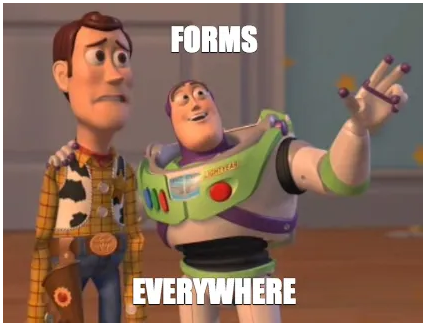

## Exemple de formulaire HTML

* Vérifier si chaque champ a une valeur valide et cohérente et informer l'utilisateur du problème peut devenir un casse-tête. HTML5 a introduit de nouveaux mécanismes pour les formulaires:

 - Il a ajouté de nouveaux types sémantiques pour l'élément `<input>` et la validation des contraintes pour faciliter le travail de vérification du contenu du formulaire côté client.
 - Les contraintes de base habituelles peuvent être vérifiées, sans avoir besoin de JavaScript, en définissant de nouveaux attributs.

In [ ]:
%%html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Exemple de formulaire</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
    <script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
    <script>
        document.addEventListener('DOMContentLoaded', function() {
            const elems = document.querySelectorAll('.autocomplete');
            M.Autocomplete.init(elems, {});
        });
    </script>

</head>
<body>
<form action="" method="post" id="login">
    <label for="email">Email :</label>
    <input type="email" id="email" name="email" required
           pattern="[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}"
           placeholder="Entrez votre email"
           class="validate" />

    <label for="password">Mot de passe :</label>
    <input type="password" id="password" name="password" required
           pattern=".{6,}" title="Le mot de passe doit contenir au moins 6 caractères"
           placeholder="Entrez votre mot de passe"
           class="validate" />

    <button class="btn" type="submit">Envoyer</button>
</form>
</body>
</html>

<img alt="Regex meme" src="https://preview.redd.it/nac35ntlfg831.jpg?width=1080&crop=smart&auto=webp&s=5f59aaa8fccd57aae13a2aa6cf9eeee01b855a33" width="400px">


In [ ]:
%%html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Exemple de formulaire</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
    <script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
    <script>
        document.addEventListener('DOMContentLoaded', function () {
            const elems = document.querySelectorAll('.autocomplete');
            M.Autocomplete.init(elems, {});
        });
    </script>

</head>
<body>
<form action="" method="post" id="login">
    <p>
        <label>
            <input type="checkbox" id="newsletter" name="newsletter"/>
            <span>Inscrivez-vous à notre newsletter</span>
        </label>
    </p>

    <p>Genre :</p>
    <p>
        <label>
            <input type="radio" name="sexe" value="homme"/>
            <span>Homme</span>
        </label>
    </p>
    <p>
        <label>
            <input type="radio" name="sexe" value="femme"/>
            <span>Femme</span>
        </label>
    </p>

    <p>
        <label>
            <input type="radio" name="sexe" value="autre"/>
            <span>Autre</span>
        </label>
    </p>

    <button class="btn" type="submit">Envoyer</button>
</form>
</body>
</html>

### **Remarque**:

* Pour plus de détails sur les [expressions rationnelles/régulières](https://developer.mozilla.org/en-US/docs/Web/HTML/Attributes/pattern) en HTML.

* Si vous décidez d'utiliser des expressions rationnelles en JavaScript, regardez le chapitre [Regular Expressions]( https://eloquentjavascript.net/09_regexp.html) du livre Eloquent JavaScript.

# Activités en classe
------------


## Supprimer un élément d'un `select`

* Écrivez une fonction JavaScript pour supprimer l'élément sélectionné d'une liste déroulante.

<!--
<script>
  function removeColor() {
    let sel = document.getElementById("color");
    sel.remove(sel.selectedIndex);
  }

  document.getElementById("btn").addEventListener('click', removeColor);
</script>
-->

In [ ]:
%%html
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
<script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
<script>
  document.addEventListener('DOMContentLoaded', function () {
    const elems = document.querySelectorAll('.autocomplete');
    M.Autocomplete.init(elems, {});
  });
</script>

<div class="row">
  <div class="col s3">
  <select id="color" class="browser-default">
    <option value="" disabled selected>Choisissez une couleur</option>
    <option value="Rouge">Rouge</option>
    <option value="Bleu">Bleu</option>
    <option value="Jaune">Jaune</option>
    <option value="Vert">Vert</option>
    <option value="Blanc">Blanc</option>
    <option value="Rose">Rose</option>
    <option value="Noire">Noire</option>
  </select>
  </div>
</div>
<div class="row">
  <div class="col s3">
    <input id="btn" type="button" value="Sélectionner et supprimer" class="btn">
  </div>
</div>

<script>
  // Completez le code...
  function removeColor() {
    let sel = document.getElementById("color");
    sel.remove(sel.selectedIndex);
  }

  document.getElementById("btn").addEventListener('click', removeColor);
</script>

## Construire le tableau de films

* Un tableau HTML est construit avec la structure suivante :
```html
<table>
  <tr>
    <th>year</th>
    <th>name</th>
    <th>genre</th>
    <th>developer</th>
  </tr>
  <tr>
    <td>2014</td>
    <td>Dragon Age: Inquisition</td>
    <td>Action role-playing</td>
    <td>BioWare</td>
  </tr>
</table>
```

* Pour chaque ligne, la balise `<table>` contient une balise `<tr>`. À l'intérieur de ces balises `<tr>` nous pouvons mettre des éléments de cellule: soit des cellules d'en-tête `<th>` ou des cellules normales `<td>`.

* Étant donné un ensemble de données de jeux vidéo sous forme d’un tableau d'objets avec des propriétés `year`, `name`, `genre` et `developer`, générez la structure DOM pour un tableau qui énumère les objets. Il doit avoir une colonne par clé et une ligne par objet, plus une ligne d'en-tête avec des éléments `<th>` en haut, répertoriant les noms de colonne.

* Écrivez le code pour que les colonnes soient automatiquement dérivées des objets, en prenant les noms de propriété du premier objet dans les données.

* Alignez à droite les cellules contenant des valeurs numériques – configurer la propriété `style.textAlign="right"`.

* **Note:** La méthode `forEach()` des tableaux et `Object.keys(obj)` pour obtenir les noms des champs d’un objet `obj` peuvent vous aider.

<!--
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>The Game Awards</title>
</head>
<body>
<h4>The Game Awards</h4>
<div id="games"></div>

<script>
  const GAMES = [
    {year: 2014, name: "Dragon Age: Inquisition", genre: "Action role-playing", developer: "BioWare"},
    {year: 2015, name: "The Witcher 3: Wild Hunt", genre: "Action role-playing", developer: "CD Projekt Red"},
    {year: 2016, name: "Overwatch", genre: "First-person shooter", developer: "Blizzard Entertainment"},
    {year: 2017, name: "The Legend of Zelda: Breath of the Wild", genre: "Action-adventure", developer: "Nintendo EPD"},
    {year: 2018, name: "God of War", genre: "Action-adventure", developer: "Santa Monica Studio"},
    {year: 2019, name: "Sekiro: Shadows Die Twice", genre: "Action-adventure", developer: "FromSoftware"},
    {year: 2020, name: "The Last of Us Part II", genre: "Action-adventure", developer: "Naughty Dog"},
    {year: 2021, name: "It Takes Two", genre: "Action-adventure", developer: "Hazelight Studios"},
  ];

  function buildTable(data) {
    let table = document.createElement("table");
    let fields = Object.keys(data[0]);

    let header = document.createElement("tr");
    fields.forEach( (field) => {
      let cell = document.createElement("th");
      cell.appendChild(document.createTextNode(field));
      header.appendChild(cell);
    });
    table.appendChild(header);

    data.forEach( (object) => {
      let row = document.createElement("tr");
      fields.forEach( (field) => {
        let cell = document.createElement("td");
        cell.appendChild(document.createTextNode(object[field]));
        if (typeof object[field] == "number") {
          cell.style.textAlign = "right";
        }
        row.appendChild(cell);
      });
      table.appendChild(row);
    });

    return table;
  }

  document.getElementById("games").appendChild(buildTable(GAMES));
</script>
</body>
</html>
-->

In [ ]:
%%html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>The Game Awards</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
<h4>The Game Awards</h4>
<div id="games"></div>

<script>
  const GAMES = [
    {year: 2014, name: "Dragon Age: Inquisition", genre: "Action role-playing", developer: "BioWare"},
    {year: 2015, name: "The Witcher 3: Wild Hunt", genre: "Action role-playing", developer: "CD Projekt Red"},
    {year: 2016, name: "Overwatch", genre: "First-person shooter", developer: "Blizzard Entertainment"},
    {year: 2017, name: "The Legend of Zelda: Breath of the Wild", genre: "Action-adventure", developer: "Nintendo EPD"},
    {year: 2018, name: "God of War", genre: "Action-adventure", developer: "Santa Monica Studio"},
    {year: 2019, name: "Sekiro: Shadows Die Twice", genre: "Action-adventure", developer: "FromSoftware"},
    {year: 2020, name: "The Last of Us Part II", genre: "Action-adventure", developer: "Naughty Dog"},
    {year: 2021, name: "It Takes Two", genre: "Action-adventure", developer: "Hazelight Studios"},
  ];

  function buildTable(data) {
    // Completez le code...
    let table = document.createElement("table");
    let fields = Object.keys(data[0]);

    let header = document.createElement("tr");
    fields.forEach( (field) => {
      let cell = document.createElement("th");
      cell.appendChild(document.createTextNode(field));
      header.appendChild(cell);
    });
    table.appendChild(header);

    data.forEach( (object) => {
      let row = document.createElement("tr");
      fields.forEach( (field) => {
        let cell = document.createElement("td");
        cell.appendChild(document.createTextNode(object[field]));
        if (typeof object[field] == "number") {
          cell.style.textAlign = "right";
        }
        row.appendChild(cell);
      });
      table.appendChild(row);
    });

    return table;
  }

  document.getElementById("games").appendChild(buildTable(GAMES));
</script>
</body>
</html>

# Les modules ECMAScript
------------

* Les modules ECMAScript (ES) ont été introduits dans la spécification ECMAScript 6 (ES6), aussi connu sous le nom d'ECMAScript 2015. Cette addition a apporté une prise en charge native des modules en JavaScript, permettant aux développeurs d'organiser leur code en modules réutilisables et structurés.

* Plus tard dans le cours nous allons regarder en détail les modules CommonJS et ES, mais dans ce cahier nous allons regarder une introduction à quelques concepts pour mieux comprendre des cadriciels que vous aurez peut-être à utiliser dans les laboratoires.

* Pour bien maîtriser les modules ES, il faut comprendre les concepts de construction et de déconstruction (destructuring) en JavaScript.


### La déconstruction

* La déconstruction est un processus qui permet d'extraire des valeurs à partir d'objets ou de tableaux en utilisant une syntaxe concise. Par exemple, avec la déconstruction, vous pouvez extraire rapidement des propriétés d'un objet dans des variables distinctes, ce qui facilite l'accès aux données.

* La déconstruction est une fonctionnalité polyvalente en JavaScript qui facilite la manipulation des données de manière plus concise et lisible.


#### Quelques exemples

* Déconstruction d'un objet:

In [ ]:
%%javascript

const person = { name: 'Léa Dubois', age: 30 };
const { name, age } = person;

console.log(name); // Affiche 'Léa Dubois'
console.log(age);  // Affiche 30

<classroom_extensions.web.JavascriptWithConsole object>

* Déconstruction dans une fonction :

In [ ]:
%%javascript

function printPerson({ name, age }) {
  console.log(`Nom : ${name}, age : ${age}`);
}

const person = { name: 'Émilie Martin', age: 25 };
printPerson(person); // Affiche 'Nom : Émilie Martin, age : 25'

<classroom_extensions.web.JavascriptWithConsole object>

* Déconstruction avec des valeurs par défaut :

In [ ]:
%%javascript

const options = { color: 'rouge', size: 'moyenne' };
const { color = 'bleu', size = 'petite', shape = 'ronde' } = options;

console.log(color);   // Affiche 'rouge'
console.log(size);    // Affiche 'moyenne'
console.log(shape);   // Affiche 'ronde'

<classroom_extensions.web.JavascriptWithConsole object>

* Déconstruction de tableaux :

In [ ]:
%%javascript

const fruits = ['pomme', 'banane', 'fraise'];
const [first, second, third] = fruits;

console.log(first);   // Affiche 'pomme'
console.log(second);  // Affiche 'banane'
console.log(third);   // Affiche 'fraise'

<classroom_extensions.web.JavascriptWithConsole object>

### La construction

* La construction, ou l'opérateur de propagation `...` (ou *spread* vu dans le cours précédent), permet de fusionner ou de cloner des objets et des tableaux de manière élégante.

* L'opérateur de propagation est également utilisé pour cloner des objets sans modifier l'original. Cela permet d'éviter les effets de bord indésirables.

#### Quelques exemples

* Construction d'un tableau :

In [ ]:
%%javascript

const numbers = [1, 2, 3];
const allNumbers = [...numbers, 4, 5];

console.log(allNumbers); // Affiche [1, 2, 3, 4, 5]

<classroom_extensions.web.JavascriptWithConsole object>

* Combinaison de tableaux :

In [ ]:
%%javascript

const firstNumbers = [1, 2, 3];
const otherNumbers = [4, 5, 6];

const numbers = [...firstNumbers, ...otherNumbers];
console.log(numbers); // Affiche [1, 2, 3, 4, 5, 6]

<classroom_extensions.web.JavascriptWithConsole object>

* Copie d'un tableau :

In [ ]:
%%javascript

const original = [10, 20, 30];
const copy = [...original];
console.log(copy); // Affiche [10, 20, 30]

<classroom_extensions.web.JavascriptWithConsole object>

* Construction d'objets :

In [ ]:
%%javascript

const person = { name: 'Élise Dupont', age: 25 };

const details = { address: '15 Rue de la Liberté, 75001 Paris, France', occupation: 'Développeur' };

const personWithDetails = { ...person, ...details };

console.log(JSON.stringify(personWithDetails));

<classroom_extensions.web.JavascriptWithConsole object>

## Introduction aux modules ES

* Voici un exemple simple pour vous montrer à quoi ressemble l'utilisation des modules ES :

* Dans un fichier nommé `math.js` ' nous exporton une fonction nommé `add`:
```javascript
export const name = "calculatrice";

 export function add(a, b) {
    return a + b;
}
```

* Une approche plus succincte consiste à regrouper l'exportation de toutes les valeurs en une seule instruction placée à la fin du fichier. Les valeurs sont séparées par des virgules et la liste est encapsulée entre des accolades :
```javascript
export { name, add };
```

* Lorsqu'un premier module exporte des fonctionnalités, il devient possible de les importer dans un script pour les utiliser. Voici la manière la plus simple de procéder :
```javascript
import { name, add } from './math.js';
const result = add(10, 5);
console.log(result); // Affichera 15
```

* Ici, on emploie l'instruction `import` suivie d'une énumération d'identifiants, séparés par des virgules et enveloppés entre des accolades. Ensuite, vient le mot-clé `from` suivi du chemin d'accès au fichier du module.


## Charger le module via le document HTML

* Il faut ensuite pouvoir charger le script `main.js` sur la page HTML. En premier lieu, il est essentiel de spécifier `type="module"` dans la balise `<script>` pour signifier que l'on charge des modules :
```html
<script type="module" src="main.js"></script>
```

* Voici un exemple qui tourne sur Colab :

In [ ]:
%%javascript --target=disk --filename=/content/math.js

const name = "calculatrice";

function add(a, b) {
  return a + b;
}

function multiply(a, b) {
  return a * b;
}

export { name, add, multiply };

In [ ]:
%http_server --port=8000 --directory=/content

Stopping any server listening on port 8000...
Starting server listening on port 8000...


In [ ]:
%%javascript --target=disk --filename=/content/script.js

import { name as moduleName, add, multiply } from './math.js';

function printResult(div, text) {
    const p = document.createElement("p");
    p.textContent = text;
    div.appendChild(p);
}

const div = document.getElementById("content");

printResult(div, moduleName);
printResult(div, add(10, 5));
printResult(div, multiply(5, 5));

In [ ]:
%%html

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Exemple module ES</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
    <script type="module" src="https://localhost:8000/script.js"></script>
</head>
<body>
    <div id="content" class="flow-text"></div>
</body>
</html>


* Il est également possible d'intégrer directement le script du module dans le fichier HTML en insérant le code JavaScript à l'intérieur de la balise `<script>` :
```html
<script type="module">
  /* Code du module JavaScript */
</script>
```

In [ ]:
%%html

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
<div id="content" class="flow-text"></div>

<script type="module">

import { name as moduleName, add, multiply } from 'https://localhost:8000/math.js';

function printResult(div, text) {
    const p = document.createElement("p");
    p.textContent = text;
    div.appendChild(p);
}

const div = document.getElementById("content");

printResult(div, moduleName);
printResult(div, add(10, 5));
printResult(div, multiply(5, 5));
</script>

* Pour plus de détails sur les modules:
  - [Les modules JavaScript](https://developer.mozilla.org/fr/docs/Web/JavaScript/Guide/Modules)
  - [ES modules: A cartoon deep-dive](https://hacks.mozilla.org/2018/03/es-modules-a-cartoon-deep-dive/)

## Activité en classe
----------

### Gestion d'une Liste de Produits

Créez trois fichiers : `index.html`, `product.js`, et `script.js`.

* Dans `product.js`, créez un module qui exporte une classe `Product` avec des propriétés telles que `nom`, `prix`, et `quantite`.

* Dans `script.js`, importez le module `Product` depuis `product.js`. Créez une liste de produits en créant plusieurs instances de la classe `Product`.

* Affichez les détails de chaque produit dans le document HTML en utilisant JavaScript.

**Remarque :** Si vous utilisez Colab pour cette activité, n'oubliez pas qu'il faut lancer le serveur HTTP et spécifier l'URL complète de `script.js` dans le fichier HTML.

<!--

export class Product {
    constructor(nom, prix, quantite) {
        this.nom = nom;
        this.prix = prix;
        this.quantite = quantite;
    }

    afficherDetails() {
        return `${this.nom} - Prix : ${this.prix} CAD - Quantité : ${this.quantite}`;
    }
}

import { Product } from './product.js';

const produits = [
    new Product('Téléphone', 299, 10),
    new Product('Ordinateur portable', 999, 5),
    new Product('Casque audio', 79, 15)
];

const listeProduitsDiv = document.getElementById('liste-produits');
produits.forEach(produit => {
    const produitDiv = document.createElement('div');
    produitDiv.classList.add("flow-text");
    produitDiv.textContent = produit.afficherDetails();
    listeProduitsDiv.appendChild(produitDiv);
});


<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Gestion d'une Liste de Produits</title>
</head>
<body>
    <div id="liste-produits"></div>
    <script type="module" src="http://localhost:8000/script.js"></script>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</body>
</html>

-->

In [ ]:
%http_server --port=8000 --directory=/content

Stopping any server listening on port 8000...
Starting server listening on port 8000...


In [ ]:
%%javascript --target=disk --filename=/content/product.js

// Completez le code...
export class Product {
    constructor(nom, prix, quantite) {
        this.nom = nom;
        this.prix = prix;
        this.quantite = quantite;
    }

    afficherDetails() {
        return `${this.nom} - Prix : ${this.prix} CAD - Quantité : ${this.quantite}`;
    }
}

In [ ]:
%%javascript --target=disk --filename=/content/script.js

// Completez le code...
import { Product } from './product.js';

const produits = [
    new Product('Téléphone', 299, 10),
    new Product('Ordinateur portable', 999, 5),
    new Product('Casque audio', 79, 15)
];

const listeProduitsDiv = document.getElementById('liste-produits');

produits.forEach(produit => {
    const produitDiv = document.createElement('div');
    produitDiv.classList.add("flow-text");
    produitDiv.textContent = produit.afficherDetails();
    listeProduitsDiv.appendChild(produitDiv);
});


In [ ]:
%%html

<!-- Completez le code... -->
<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Gestion d'une Liste de Produits</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
</head>
<body>
    <div id="liste-produits"></div>
    <script type="module" src="http://localhost:8000/script.js"></script>
</body>
</html>

# References
--------------

* [Forms and Form Fields](https://eloquentjavascript.net/2nd_edition/18_forms.html)
* Marijn Haverbeke, Eloquent JavaScript, 3rd edition, 2018.
* [Node properties: type, tag and contents](https://javascript.info/basic-dom-node-properties)
* Notes du cours CPEN400A donné à la University of British Columbia (Karthik Pattabiraman et Julien Gascon-Samson).
* JavaScript: The Definitive Guide, 7th Edition, David Flanagan, O'Reilly Media, Inc., May 2020.
* [Attribut HTML : pattern](https://developer.mozilla.org/fr/docs/Web/HTML/Attributes/pattern)